In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('C:/Users/sid31/Downloads/New folder/semester 2/machine learning/project/data/Kaggle-data.csv',low_memory=False)

In [4]:
df.head()

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,Unnamed: 57
0,1,b69acb3bb133974e48229627663f96d4,332,224,8450,8.0,0,16896,8192,0,...,3.492126,3.492126,3.492126,864.0,864.0,864,72,0,1,NaN
1,2,1cbee4b3725629bd0aa6ac2ff500925f,332,224,258,9.0,0,84480,25600,0,...,3.486827,3.486827,3.486827,892.0,892.0,892,72,0,1,NaN
2,3,b7027cf0cd31c820928950cbfe7e91ef,332,224,8450,8.0,0,4608,3584,0,...,3.517270,3.517270,3.517270,952.0,952.0,952,72,0,1,NaN
3,4,156a0bb069f94d1e7c2508318805f2a4,332,224,8450,10.0,0,108544,15872,0,...,3.270559,3.034188,3.506931,1032.0,972.0,1092,72,0,1,NaN
4,5,c72bf851fed5542abba904b1f3944cd5,332,224,8226,48.0,0,513024,2048,0,...,3.420977,3.420977,3.420977,954.0,954.0,954,0,0,1,NaN


In [5]:
df.drop(['ID','md5','Unnamed: 57'],axis=1,inplace= True)

In [6]:
df.dtypes # machine has the obeject dtype, lets find unique values 
df['Machine'].unique()

array(['332', '34404', '450', '422', '512', '43620',
       '3ab1aa9785d0681434766bb0ffc4a13c', '452'], dtype=object)

In [7]:
k = df[df['Machine'] == '3ab1aa9785d0681434766bb0ffc4a13c']
k.shape # only one machine name treated as outlier , so removing the follownig

(1, 55)

In [8]:
df = df[df.Machine != '3ab1aa9785d0681434766bb0ffc4a13c']
df.dropna(inplace= True)

In [9]:
df.isna().sum() # no NAN values present but a dtype object is listed - lets convert to int type

Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeapCommit               0
LoaderFlags                    0
NumberOfRv

In [10]:
df['Machine'] = df['Machine'].astype(str).astype(int)

In [11]:
class normalise_data:
    def __init__(self):
        self.mean = None
        self.std = None
        
    def norm_data(self, data):
        self.mean = np.mean(data, 0)
        self.std = np.std(data, 0)
        normalise_data = (data - self.mean) / self.std
        normalise_data = self.addBias(normalise_data)
        return normalise_data
    
    def norm_test_data(self,data):
        norm_test_data = (data - self.mean) / self.std
        norm_test_data = self.addBias(norm_test_data)
        return norm_test_data
    
    def addBias(self, data):
        return np.column_stack([np.ones((data.shape[0],1)),data])

In [12]:
x_train , x_test, y_train, y_test = train_test_split(df.values[:,0:-1],df.values[:,-1], test_size = 0.3, random_state = 0)
scale = normalise_data()
X_train = scale.norm_data(x_train)
X_test = scale.norm_test_data(x_test)

In [13]:
X_test.shape

(64905, 55)

In [12]:

# never use PCA for model performance, use only for visualising
#first try optimising using original features and compare your models 
# if everything isnt working then try using principle components
'''
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.component = None
        #self.mean = None
        
    def fit(self, X):
        #self.mean = np.mean(X, axis = 0)
        #X = X - self.mean
        
        cov = np.cov(X.T)
        eigenValues, eigenVectors = np.linalg.eig(cov)
        eigenVectors = eigenVectors.T
        
        ids = np.argsort(eigenValues)[::-1]
        eigenValues = eigenValues[ids]
        eigenVectors = eigenVectors[ids]
        
        self.component = eigenVectors[0: self.n_components]
        
    def transform(self,X):
        #X = X - self.mean
        return np.dot(X, self.component.T)
        
'''
        

In [21]:

# This part of code shows how many principle components to select using the formula 

#  k
# sigma Si
# i = 1
# _________   > 0.99      that is 99% of the varience is captured using PCA 
#   n
# sigma Si
# i = 1

# where Si are the eigen values returned as a diagonol matrix
'''

k_m = [3,4,5,6,10]
sum_k = 0
total= 0
max_k = 0
for k in k_m:
    cov = np.cov(X_train.T)
    u , s, v = np.linalg.svd(cov)
    for i in range(k):
        sum_k+= s[i]
        #print(s[i])
    total = sum(s)
    max_k = sum_k/total
    #print(max_k)
    if max_k > 0.99:
        print(k)
        break

'''

6


In [19]:
'''
model = PCA(n_components = 10)
model.fit(X_train)
x_projected = model.transform(X_train)
x_test_projected = model.transform(X_test)
'''

In [15]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score 
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(x_projected, y_train) 
y_pred = classifier.predict(x_test_projected) 
cm = confusion_matrix(y_test, y_pred) 
print(cm) 
accuracy_score(y_test,y_pred)

[[40023  2242]
 [ 2677 19963]]


0.9242123102996688

In [43]:
class logitRegressor():
    def __init__(self, X_train,y_train,
                            x_test, y_test,
                 reg_param,
                 iterations,
                 tol,
                 SGDiterations,
                 thresh, 
                 gd = False, 
                 sgd = False, 
                 reg = False):
        
        
        self.reg_param = reg_param
        self.gd = gd
        self.sgd = sgd
        self.reg = reg
        self.iterations = iterations 
        self.tol = tol 
        self.SGDiterations = SGDiterations
        self.thresh = thresh
        self.X = X_train
        self.y = y_train 
        self.x_test = x_test
        self.y_test = y_test
        self.spe = []
        self.sen = []
        self.min_lr = 1e-5
        self.max_lr = 1e-2
        
        
        
    def fit(self):
        if not self.sgd:
            #self.theta = np.ones(self.X.shape[1], dtype = np.float64) *0
            if not self.reg:
                print("gradient without regularization...")
                self.gradientUpdate(self.X,self.y)
                
            if not self.sgd and self.reg:
                print("gradient descent using regularization...")
                self.gradientUpdateWithReg(self.X,self.y)
            
        
    def costFunc(self, X, y):
        cost = - y * (np.log(self.sigmoid(np.dot(X,self.theta)))) - (1 - y) * (np.log(1 - self.sigmoid(np.dot(X,self.theta)))) 
        return np.sum(cost) / X.shape[0]
        
    def costFuncDerivative(self, X, y):
        return np.dot(self.sigmoid(np.dot(self.theta,X.T)) - y, X )
        
    def predict(self, X):
        pred =  1 / (1 + np.exp(- X.dot(self.theta)))
        for t in self.thresh:
            y_pred =  np.where(pred >t , 1,0 )
            true_positive_rate , false_positive_rate = self.roc(y_pred, self.y_test)
            self.spe.append(false_positive_rate)
            self.sen.append(true_positive_rate)


        #return y_pred
    
    
    def sigmoid(self,z):
        return 1 / (1+np.exp(-z))
        
    def roc(self,y_pred,y):
        # tn / tn + fp
        tp = 0 
        tn = 0
        fp = 0
        fn = 0
        #print(tre)
        #y_pred = self.predict(X,tre)
        for i in range(len(y_pred)):
            if y_pred[i] == 1 and y[i] == 1:
                tp+= 1
            if y_pred[i] == 1 and y[i] == 0:
                fp+= 1
            if y_pred[i] == 0 and y[i] == 1:
                tn+= 1
            if y_pred[i] == 0 and y[i] == 0:
                fn+= 1
        
        print("tp", tp)
        print("fp", fp)
        print("tn", tn)
        print("fn", fn)
        sensitivity = tp / (tp + fn)
        specificity = fp / (tn + fp)
        return sensitivity, specificity
        
    
    def gradientUpdate(self, X, y):
        prev_error = float('inf')
        #for tre in range(len(self.thresh)):
        self.learning_rate = self.min_lr
        self.theta = np.ones(X.shape[1], dtype = np.float64) *0
        for t in tqdm(range(self.iterations)):
            self.theta = self.theta - self.learning_rate * (self.costFuncDerivative(X,y))
            curr = self.costFunc(X,y)
            diff = prev_error - curr
            prev_error = curr
            update_lr = t / self.iterations
            self.learning_rate = self.min_lr + (self.max_lr - self.min_lr) * update_lr
            if abs(diff) < self.tol: # in real life you need to wait patience* until certain iterations before you break
                print("model stopped - no further updating")
                break

        #sen, spe = self.roc(self.x_test,self.y_test,self.thresh[tre])
        #self.spe.append(spe)
        #self.sen.append(sen)
            
    def gradientUpdateWithReg(self, X,y):
        prev_error = float('inf')
        self.learning_rate = self.min_lr
        self.theta = np.ones(X.shape[1], dtype = np.float64) *0
        for t in tqdm(range(self.iterations)):
            weights = self.theta * (1 - (self.reg_param) * (self.learning_rate / X.shape[0]))
            self.theta = weights - self.learning_rate * (self.costFuncDerivative(X,y) / X.shape[0])

            curr = self.costFunc(X,y)
            diff = prev_error - curr
            prev_error = curr
            update_lr = t / self.iterations
            self.learning_rate = self.min_lr + (self.max_lr - self.min_lr) * update_lr
            if abs(diff) < self.tol: # in real life you need to wait patience* until certain iterations before you break
                print("model stopped - no further updating")
                break

        #sen, spe = self.roc(self.x_test,self.y_test,self.thresh[tre])
        #self.spe.append(spe)
        #self.sen.append(sen)
            
    def plotRoc(self, figsize = (7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.sen,self.spe)
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title("ROC Curve")
        plt.show()
        
  

gradient without regularization...


  0%|▏                                                                              | 21/10000 [00:00<03:25, 48.49it/s]


model stopped - no further updating
tp 22470
fp 25988
tn 170
fn 16277
tp 22073
fp 9030
tn 567
fn 33235
tp 22004
fp 8357
tn 636
fn 33908
tp 21664
fp 6026
tn 976
fn 36239
tp 21351
fp 4384
tn 1289
fn 37881
tp 20795
fp 2880
tn 1845
fn 39385


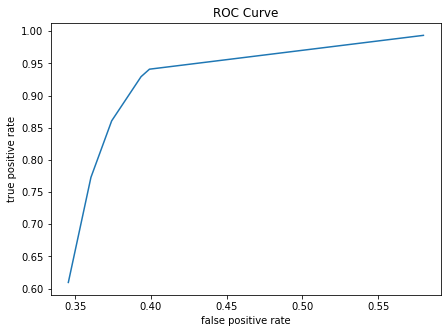

In [44]:
modellogit = logitRegressor(X_train,y_train,
                            X_test, y_test, 
                            reg_param = 0.03
                            ,iterations = 10000
                            ,tol = 0.0005
                            ,SGDiterations = 10
                            ,thresh = [0.03,0.09,0.1,0.15,0.2,0.3]
                            , gd = True, sgd = False, reg = False)
modellogit.fit()
modellogit.predict(modellogit.x_test)
modellogit.plotRoc()

gradient descent using regularization...


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:28<00:00, 47.97it/s]


tp 22489
fp 27424
tn 151
fn 14841
tp 22126
fp 10293
tn 514
fn 31972
tp 22056
fp 9053
tn 584
fn 33212
tp 21706
fp 6268
tn 934
fn 35997
tp 21402
fp 4552
tn 1238
fn 37713
tp 20814
fp 2935
tn 1826
fn 39330
tp 17751
fp 856
tn 4889
fn 41409


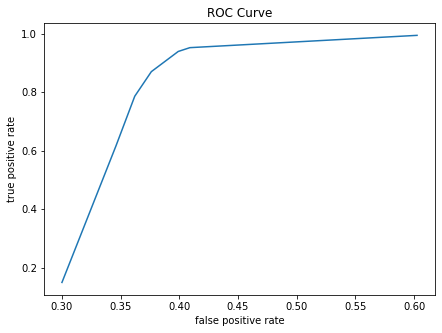

In [46]:
modellogit1 = logitRegressor(X_train,y_train,
                            X_test, y_test, 
                            reg_param = 0.03
                            ,iterations = 10000
                            ,tol = 0.000000005
                            ,SGDiterations = 10
                            ,thresh = [0.03,0.09,0.1,0.15,0.2,0.3,0.7]
                            , gd = True, sgd = False, reg = True)
modellogit1.fit()
modellogit1.predict(modellogit.x_test)
modellogit1.plotRoc()

gradient descent using regularization...


 31%|████████████████████████▊                                                      | 314/1000 [00:17<00:39, 17.49it/s]C:\Users\sid31\AppData\Local\Temp/ipykernel_26572/3550032786.py:47: RuntimeWarning: divide by zero encountered in log
  cost = - y * (np.log(self.predict(X,tre))) - (1 - y) * (np.log(self.predict(X,tre)))
C:\Users\sid31\AppData\Local\Temp/ipykernel_26572/3550032786.py:47: RuntimeWarning: invalid value encountered in multiply
  cost = - y * (np.log(self.predict(X,tre))) - (1 - y) * (np.log(self.predict(X,tre)))
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.69it/s]


0.1
tp 21380
fp 5766
tn 1260
fn 36499


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.78it/s]


0.2
tp 20976
fp 3796
tn 1664
fn 38469


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.11it/s]


0.3
tp 20658
fp 2903
tn 1982
fn 39362


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.47it/s]


0.4
tp 20362
fp 3069
tn 2278
fn 39196


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:30<00:00, 11.05it/s]


0.5
tp 19981
fp 1867
tn 2659
fn 40398


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.39it/s]


0.6
tp 19540
fp 1724
tn 3100
fn 40541


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.18it/s]


0.7
tp 18061
fp 1581
tn 4579
fn 40684


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.97it/s]


0.8
tp 16794
fp 1433
tn 5846
fn 40832


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.94it/s]


0.9
tp 15299
fp 964
tn 7341
fn 41301


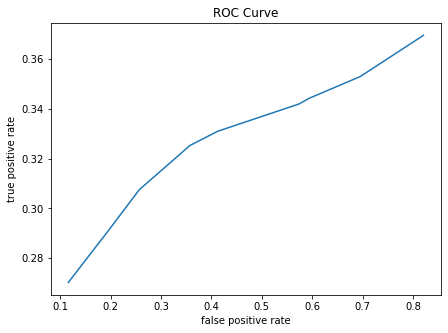

In [14]:
modellogit3 = logitRegressor(X_train,y_train,
                            X_test, y_test, 
                            reg_param = 0.03
                            ,iterations = 1000
                            ,tol = 0.00000000000000005
                            ,SGDiterations = 10
                            ,thresh = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
                            , gd = True, sgd = False, reg = True)
modellogit3.fit()
modellogit3.plotRoc()

In [4]:
x = [0,0,1,1,1,1]
y = [1,0,0,1,1,1]
k = 0
t = 0
m = 0
np.where(x == 1 and y ==1, k+=1,)
k
t
m

SyntaxError: invalid syntax (Temp/ipykernel_23516/1260563709.py, line 6)

In [ ]:
cost = - y * (np.log(self.predict(X,tre))) - (1 - y) * (np.log(self.predict(X,tre))) 
cost = cost.sum()